In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [151]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [152]:
data.shape

(13320, 9)

# EDA

In [153]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

##Society

In [154]:
data.drop(['society'] , axis = 1 , inplace = True)

##Availability

In [155]:
pd.unique(data['availability'])

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [156]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [157]:
data.drop(['availability'] ,axis = 1 , inplace = True)

In [158]:
data.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

##balcony


In [159]:
pd.unique(data['balcony'])

array([ 1.,  3., nan,  2.,  0.])

In [160]:
data['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [161]:
 zero_balcony_price= data.loc[data['balcony'] == 0.0 , 'price' ]

In [162]:
len(zero_balcony_price)

1029

In [163]:
 one_balcony_price= data.loc[data['balcony'] == 1.0 , 'price' ]
 len(one_balcony_price)

4897

In [164]:
two_balcony_price= data.loc[data['balcony'] == 2.0 , 'price' ]
len(two_balcony_price)

5113

In [165]:
 three_balcony_price= data.loc[data['balcony'] == 3.0 , 'price' ]
 len(three_balcony_price)

1672

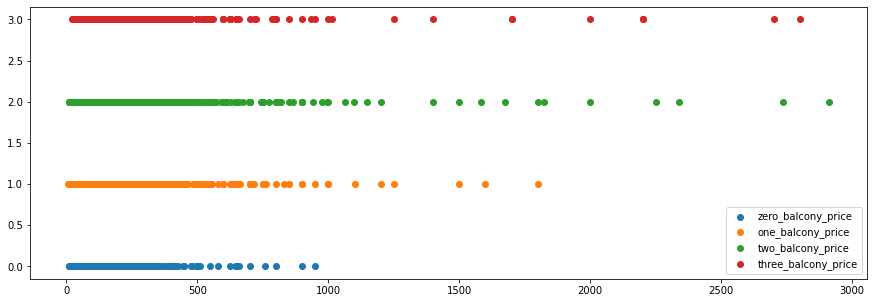

In [166]:
plt.figure(figsize=(15,5))
plt.scatter(zero_balcony_price , np.zeros(len(zero_balcony_price)))
plt.scatter(one_balcony_price , np.ones(len(one_balcony_price)))
plt.scatter(two_balcony_price , np.ones(len(two_balcony_price))+1)
plt.scatter(three_balcony_price , np.zeros(len(three_balcony_price))+3);
plt.legend(['zero_balcony_price', 'one_balcony_price' ,'two_balcony_price' ,  'three_balcony_price' ])

In [167]:
print("zero_balcony_price Mean : " , zero_balcony_price.mean())
print("one_balcony_price Mean : " , one_balcony_price.mean())
print("two_balcony_price Mean : " , two_balcony_price.mean())
print("three_balcony_price Mean : " , three_balcony_price.mean())

zero_balcony_price Mean :  110.69846938775511
one_balcony_price Mean :  85.7300633040637
two_balcony_price Mean :  109.98194797574808
three_balcony_price Mean :  150.74876794258373


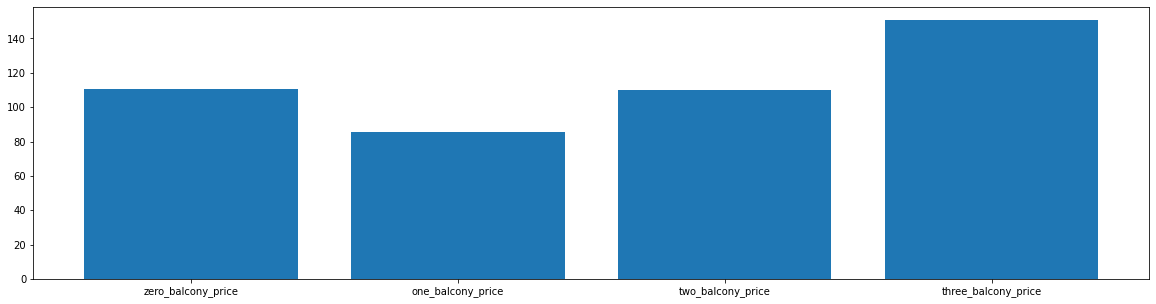

In [168]:
plt.figure(figsize=(20,5))
name = ['zero_balcony_price' , 'one_balcony_price' ,'two_balcony_price','three_balcony_price']
value = [zero_balcony_price.mean() , one_balcony_price.mean() ,two_balcony_price.mean(),three_balcony_price.mean()]
plt.bar(name , value);

In [169]:
data.drop(['balcony'] , axis = 1 , inplace = True)

In [170]:
data.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

##Area_type

In [171]:
pd.unique(data['area_type'] )

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [172]:
data["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [173]:
 Super_built_up_area_price = data.loc[data['area_type'] == 'Super built-up  Area' , 'price' ]

In [174]:
# Super_built_up_area_price.shape

In [175]:
# Super_built_up_area_price.mean()

In [176]:
Built_up_area_price = data.loc[data['area_type'] == 'Built-up  Area' , 'price' ]

In [177]:
plot_area_price = data.loc[data['area_type'] == 'Plot  Area' , 'price' ]

In [178]:
# plot_area_price

In [179]:
Carpet_area_price = data.loc[data['area_type'] == 'Carpet  Area' , 'price' ]

In [180]:
# ?plt.hist

In [181]:
# np.zeros(10)+2


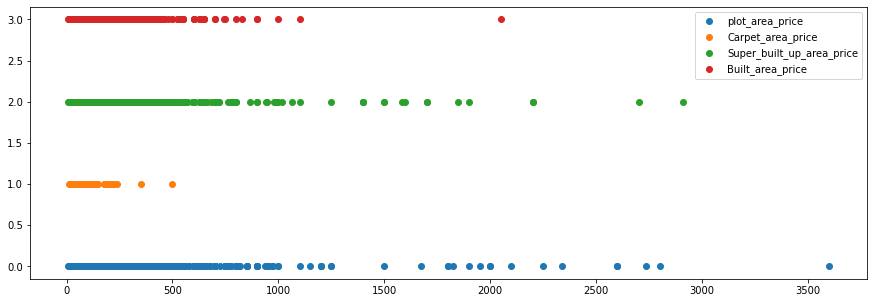

In [182]:
plt.figure(figsize=(15,5))
plt.scatter(plot_area_price , np.zeros(len(plot_area_price)))
plt.scatter(Carpet_area_price , np.ones(len(Carpet_area_price)))
plt.scatter(Super_built_up_area_price , np.ones(len(Super_built_up_area_price))+1)
plt.scatter(Built_up_area_price , np.zeros(len(Built_up_area_price))+3);
plt.legend(['plot_area_price', 'Carpet_area_price' ,'Super_built_up_area_price' ,  'Built_area_price' ])

In [183]:
print("Super_built_up_area_price Mean : " , Super_built_up_area_price.mean())
print("Built_up_area_price Mean : " , Built_up_area_price.mean())
print("plot_area_price Mean : " , plot_area_price.mean())
print("Carpet_area_price Mean : " , Carpet_area_price.mean())

Super_built_up_area_price Mean :  92.97175711035267
Built_up_area_price Mean :  104.2854983457403
plot_area_price Mean :  208.4954864197531
Carpet_area_price Mean :  89.50235632183907


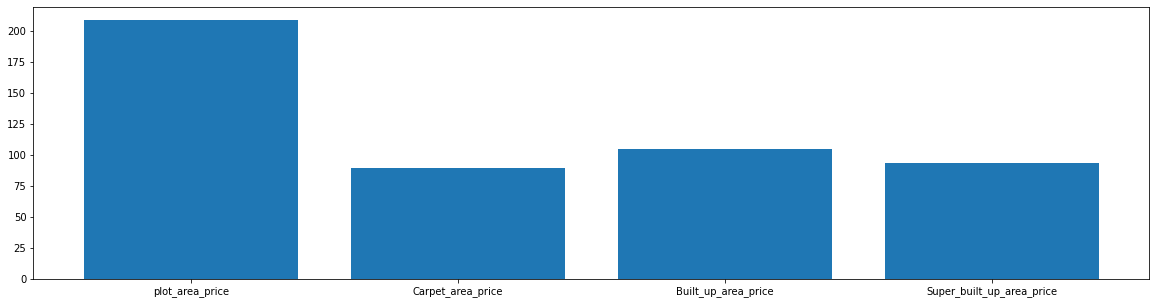

In [184]:
plt.figure(figsize=(20,5))
name = ['plot_area_price' , 'Carpet_area_price' ,'Built_up_area_price','Super_built_up_area_price']
value = [plot_area_price.mean() , Carpet_area_price.mean() ,Built_up_area_price.mean(),Super_built_up_area_price.mean()]
plt.bar(name , value);

In [185]:
data.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

##Removed Nan values

In [186]:
data.dropna(inplace = True)

In [187]:
data.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

##Location


In [188]:
loc = pd.unique(data['location'])
len(loc)

1304

In [189]:
loc_count = data['location'].value_counts()
loc_count.head(10)

Whitefield               534
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           266
Thanisandra              233
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [190]:
loc_count.tail(10)

Medi Agrahara        1
Sadduguntepalya      1
Shirdi Sai Nagar     1
S R Layout           1
Meenakshi Layout     1
Vidyapeeta           1
Maruthi Extension    1
Okalipura            1
Old Town             1
Abshot Layout        1
Name: location, dtype: int64

In [191]:
loc_count_low = (loc_count[loc_count<=10])
len(loc_count_low)

1063

In [192]:
def other(x):
  if(x in loc_count_low):
    return 'Other'
  return x

In [193]:
data['new_location'] = data['location'].apply(other)

In [194]:
data.head(10)

,area_type,location,size,total_sqft,bath,price,new_location
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,Electronic City Phase II
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,Chikka Tirupathi
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,Lingadheeranahalli
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,Kothanur
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,38.00,Whitefield
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,204.00,Old Airport Road
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,600.00,Rajaji Nagar
8,Super built-up Area,Marathahalli,3 BHK,1310,3.0,63.25,Marathahalli
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,Other


In [195]:
data.tail(10)

,area_type,location,size,total_sqft,bath,price,new_location
13310,Super built-up Area,Rachenahalli,2 BHK,1050,2.0,52.71,Rachenahalli
13311,Plot Area,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.00,Ramamurthy Nagar
13312,Super built-up Area,Bellandur,2 BHK,1262,2.0,47.00,Bellandur
13313,Super built-up Area,Uttarahalli,3 BHK,1345,2.0,57.00,Uttarahalli
13314,Super built-up Area,Green Glen Layout,3 BHK,1715,3.0,112.00,Green Glen Layout
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00,Whitefield
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00,Other
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,Raja Rajeshwari Nagar
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00,Padmanabhanagar
13319,Super built-up Area,Doddathoguru,1 BHK,550,1.0,17.00,Doddathoguru


In [196]:
len(data[data.new_location == 'Other'])

2896

In [197]:
len(data['new_location'].unique())

242

In [198]:
data.drop(['location'] , axis = 1 , inplace = True)

##Size

In [199]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [200]:
data['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [201]:
data.head()

,area_type,size,total_sqft,bath,price,new_location
0,Super built-up Area,2 BHK,1056,2.0,39.07,Electronic City Phase II
1,Plot Area,4 Bedroom,2600,5.0,120.00,Chikka Tirupathi
2,Built-up Area,3 BHK,1440,2.0,62.00,Uttarahalli
3,Super built-up Area,3 BHK,1521,3.0,95.00,Lingadheeranahalli
4,Super built-up Area,2 BHK,1200,2.0,51.00,Kothanur


In [202]:
data['size_new'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [203]:
data.head()

,area_type,size,total_sqft,bath,price,new_location,size_new
0,Super built-up Area,2 BHK,1056,2.0,39.07,Electronic City Phase II,2
1,Plot Area,4 Bedroom,2600,5.0,120.00,Chikka Tirupathi,4
2,Built-up Area,3 BHK,1440,2.0,62.00,Uttarahalli,3
3,Super built-up Area,3 BHK,1521,3.0,95.00,Lingadheeranahalli,3
4,Super built-up Area,2 BHK,1200,2.0,51.00,Kothanur,2


In [204]:
data['size_new'].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [205]:
data['size_new'].value_counts()



2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size_new, dtype: int64

In [206]:
data[data.size_new>15]

,area_type,size,total_sqft,bath,price,new_location,size_new
1718,Super built-up Area,27 BHK,8000,27.0,230.0,Other,27
3379,Super built-up Area,19 BHK,2000,16.0,490.0,Other,19
3609,Super built-up Area,16 BHK,10000,16.0,550.0,Other,16
4684,Plot Area,43 Bedroom,2400,40.0,660.0,Munnekollal,43
11559,Plot Area,18 Bedroom,1200,18.0,200.0,Other,18


In [207]:
data.drop(['size'], axis = 1, inplace = True)

In [208]:
data.head()

,area_type,total_sqft,bath,price,new_location,size_new
0,Super built-up Area,1056,2.0,39.07,Electronic City Phase II,2
1,Plot Area,2600,5.0,120.00,Chikka Tirupathi,4
2,Built-up Area,1440,2.0,62.00,Uttarahalli,3
3,Super built-up Area,1521,3.0,95.00,Lingadheeranahalli,3
4,Super built-up Area,1200,2.0,51.00,Kothanur,2


##total_sqft


In [209]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [210]:
data.applymap(np.isreal)

,area_type,total_sqft,bath,price,new_location,size_new
0,False,False,True,True,False,True
1,False,False,True,True,False,True
2,False,False,True,True,False,True
3,False,False,True,True,False,True
4,False,False,True,True,False,True
...,...,...,...,...,...,...
13315,False,False,True,True,False,True
13316,False,False,True,True,False,True
13317,False,False,True,True,False,True
13318,False,False,True,True,False,True


In [211]:
def  is_num(x):
  try:
    float(x)
  except:
    return False
  return True

In [212]:
~data['total_sqft'].apply(is_num)

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: total_sqft, Length: 13246, dtype: bool

In [213]:
data[~data['total_sqft'].apply(is_num)].head(10)

,area_type,total_sqft,bath,price,new_location,size_new
30,Super built-up Area,2100 - 2850,4.0,186.000,Yelahanka,4
122,Super built-up Area,3067 - 8156,4.0,477.000,Hebbal,4
137,Super built-up Area,1042 - 1105,2.0,54.005,8th Phase JP Nagar,2
165,Super built-up Area,1145 - 1340,2.0,43.490,Sarjapur,2
188,Super built-up Area,1015 - 1540,2.0,56.800,KR Puram,2
410,Super built-up Area,34.46Sq. Meter,1.0,18.500,Kengeri,1
549,Super built-up Area,1195 - 1440,2.0,63.770,Hennur Road,2
648,Built-up Area,4125Perch,9.0,265.000,Arekere,9
661,Super built-up Area,1120 - 1145,2.0,48.130,Yelahanka,2
672,Built-up Area,3090 - 5002,4.0,445.000,Other,4


In [214]:
data[~data['total_sqft'].apply(is_num)].tail(10)

,area_type,total_sqft,bath,price,new_location,size_new
12544,Super built-up Area,4000 - 4450,6.0,359.000,Hebbal,4
12560,Super built-up Area,142.84Sq. Meter,3.0,110.000,Hosa Road,3
12652,Plot Area,300Sq. Yards,2.0,150.000,Other,2
12791,Super built-up Area,1115 - 1130,2.0,61.740,Bannerghatta Road,2
12955,Super built-up Area,1437 - 1629,3.0,75.885,Thanisandra,3
12975,Super built-up Area,850 - 1060,2.0,38.190,Whitefield,2
12990,Super built-up Area,1804 - 2273,3.0,122.000,Talaghattapura,3
13059,Super built-up Area,1200 - 1470,2.0,72.760,Harlur,2
13265,Super built-up Area,1133 - 1384,2.0,59.135,Hoodi,2
13299,Super built-up Area,2830 - 2882,5.0,154.500,Whitefield,4


In [215]:
def sqft_to_num(x):
  nums = x.split("-")
  if(len(nums) == 2):
    return (float(nums[0]) + float(nums[1]))/2

  try:
    return float(x)
  except:
    return None

In [216]:
data['new_sqft'] = data['total_sqft'].apply(sqft_to_num)

In [217]:
data.isna().sum()

area_type        0
total_sqft       0
bath             0
price            0
new_location     0
size_new         0
new_sqft        46
dtype: int64

In [218]:
data.dropna(inplace = True)

In [219]:
data.isna().sum()

area_type       0
total_sqft      0
bath            0
price           0
new_location    0
size_new        0
new_sqft        0
dtype: int64

In [220]:
data.drop(['total_sqft'] , inplace = True, axis = 1)

In [221]:
data['price_per_sqft'] = (data['price']*100000)/data['new_sqft']

In [222]:
data.head()

,area_type,bath,price,new_location,size_new,new_sqft,price_per_sqft
0,Super built-up Area,2.0,39.07,Electronic City Phase II,2,1056.0,3699.810606
1,Plot Area,5.0,120.00,Chikka Tirupathi,4,2600.0,4615.384615
2,Built-up Area,2.0,62.00,Uttarahalli,3,1440.0,4305.555556
3,Super built-up Area,3.0,95.00,Lingadheeranahalli,3,1521.0,6245.890861
4,Super built-up Area,2.0,51.00,Kothanur,2,1200.0,4250.000000


In [223]:
data.shape

(13200, 7)

## Looking for outliers.

In [224]:
data[(data.new_sqft/data.size_new)<300].head()

,area_type,bath,price,new_location,size_new,new_sqft,price_per_sqft
9,Plot Area,6.0,370.0,Other,6,1020.0,36274.509804
45,Plot Area,9.0,200.0,HSR Layout,8,600.0,33333.333333
58,Plot Area,4.0,150.0,Murugeshpalya,6,1407.0,10660.980810
68,Plot Area,7.0,85.0,Other,8,1350.0,6296.296296
70,Plot Area,3.0,100.0,Other,3,500.0,20000.000000


In [225]:
data = data[~((data.new_sqft/data.size_new)<300)]

In [226]:
data.shape

(12456, 7)

In [227]:
 data['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [228]:
 def remove_per_location_outliers(dataf):
   df_filter = pd.DataFrame()
   for loc , subdataf in dataf.groupby('new_location'):
     mean_ = np.mean(subdataf.price_per_sqft)
     std_ = np.std(subdataf.price_per_sqft)
     reduced_data = subdataf[(subdataf.price_per_sqft>(mean_-std_)) & (subdataf.price_per_sqft<=(mean_+std_))]
     df_filter = pd.concat([df_filter , reduced_data], ignore_index = True)
   return df_filter

In [229]:
data_ = remove_per_location_outliers(data)

In [230]:
data_.shape

(10244, 7)

In [231]:
def plot_scatter_plot_for_each_location_2bhk_3bhk_price(dataf , locc):
  bhk2 = dataf[(dataf.new_location == locc) & (dataf.size_new == 2)]
  bhk3 = dataf[(dataf.new_location == locc) & (dataf.size_new == 3)]

  plt.figure(figsize = (15 , 10))
  plt.scatter(bhk2.new_sqft , bhk2.price , label = '2 BHK' )
  plt.scatter(bhk3.new_sqft , bhk3.price , label = '3 BHK' , marker = '+' , color = 'green')
  plt.xlabel('Square Feet Area')
  plt.ylabel('Price Per Square Feet')
  plt.title(locc)
  plt.legend()



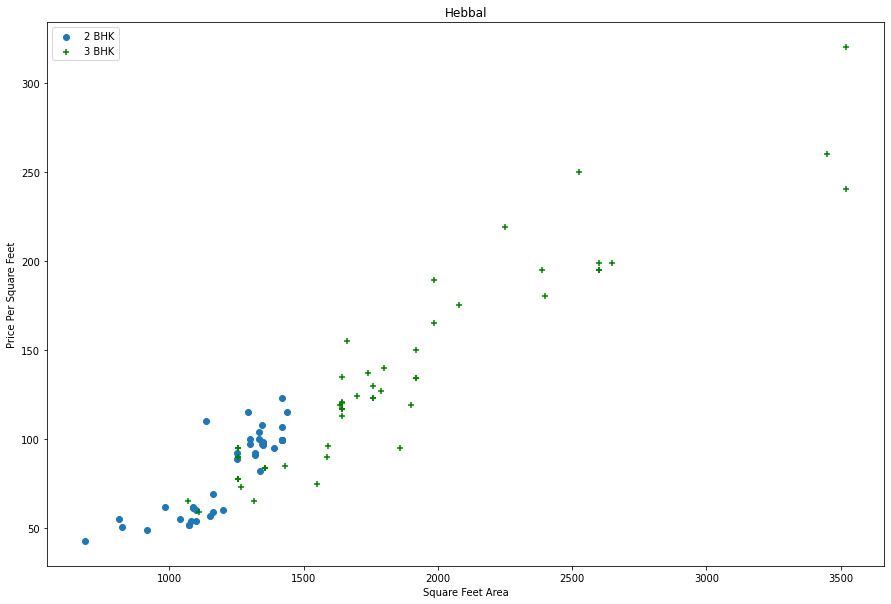

In [232]:
plot_scatter_plot_for_each_location_2bhk_3bhk_price(data_ , 'Hebbal')

In [233]:
def remove_bhk_outliers(dataf):
  exclude_indices = np.array([])
  for loc_ , loc_df in dataf.groupby('new_location'):
    bhk_stats = {}
    for bhk , bhk_df in loc_df.groupby('size_new'):
      bhk_stats[bhk] = {
          'mean' : np.mean(bhk_df.price_per_sqft),
          'std' : np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }

      for bhk , bhk_df in loc_df.groupby('size_new'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count'] > 5:
          exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return dataf.drop(exclude_indices , axis = 'index')


In [234]:
df = remove_bhk_outliers(data_)

In [235]:
df.shape

(7342, 7)

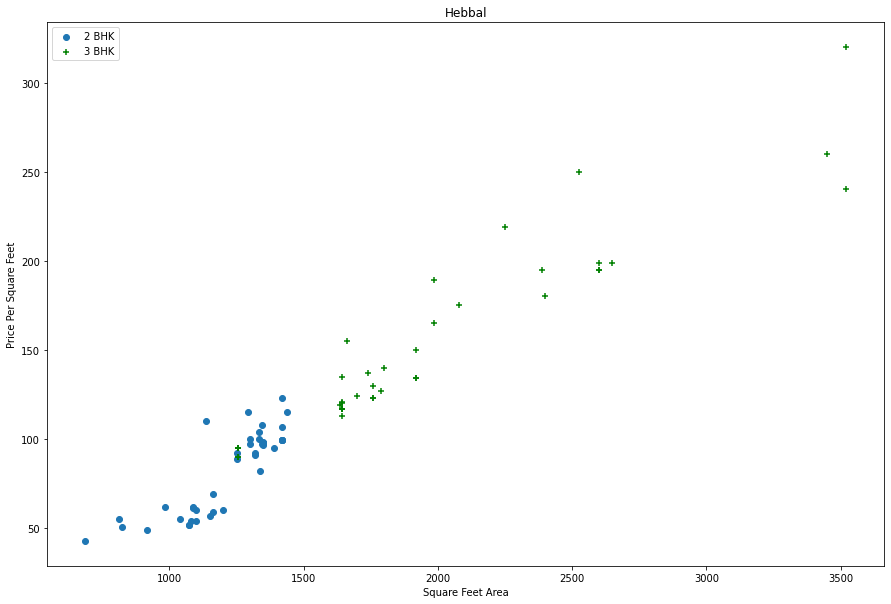

In [236]:
plot_scatter_plot_for_each_location_2bhk_3bhk_price(df , 'Hebbal')

Text(0, 0.5, 'Count')

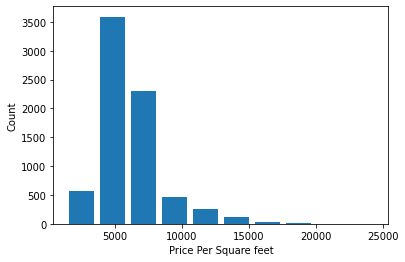

In [237]:
plt.hist(df.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price Per Square feet')
plt.ylabel('Count')

In [238]:
df.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [239]:
df[df.bath>10]

,area_type,bath,price,new_location,size_new,new_sqft,price_per_sqft
5271,Super built-up Area,12.0,160.0,Neeladri Nagar,10,4000.0,4000.000000
5924,Super built-up Area,12.0,525.0,Other,10,12000.0,4375.000000
6013,Super built-up Area,16.0,550.0,Other,16,10000.0,5500.000000
6752,Super built-up Area,12.0,150.0,Other,11,6000.0,2500.000000
7084,Super built-up Area,13.0,275.0,Other,13,5425.0,5069.124424


Text(0, 0.5, 'Count')

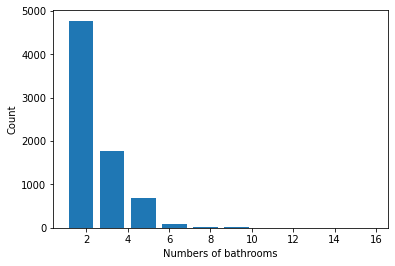

In [240]:
plt.hist(df.bath , rwidth = 0.8)
plt.xlabel("Numbers of bathrooms")
plt.ylabel("Count")


In [241]:
df[df.bath>df.size_new+2]

,area_type,bath,price,new_location,size_new,new_sqft,price_per_sqft
1637,Built-up Area,7.0,80.0,Chikkabanavar,4,2460.0,3252.032520
5232,Built-up Area,8.0,450.0,Nagasandra,4,7000.0,6428.571429
5848,Super built-up Area,9.0,1000.0,Other,6,11338.0,8819.897689
9016,Super built-up Area,6.0,116.0,Thanisandra,3,1806.0,6423.034330


In [242]:
df_ = df[df.bath<df.size_new+2]

In [243]:
df_.shape

(7264, 7)

In [244]:
 df_fi = df_.drop(['price_per_sqft'] , axis = 1)

In [245]:
df_fi.head()

,area_type,bath,price,new_location,size_new,new_sqft
1,Super built-up Area,2.0,40.0,Devarachikkanahalli,2,1250.0
2,Plot Area,2.0,83.0,Devarachikkanahalli,2,1200.0
3,Super built-up Area,2.0,40.0,Devarachikkanahalli,2,1170.0
4,Super built-up Area,2.0,65.0,Devarachikkanahalli,3,1425.0
5,Super built-up Area,2.0,43.0,Devarachikkanahalli,2,947.0


In [246]:
dum1 = pd.get_dummies(df_fi['area_type'])

In [247]:
dum1

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
10233,0,0,0,1
10234,0,0,0,1
10236,1,0,0,0
10241,0,0,0,1


In [248]:
df_fi = pd.concat([df_fi , dum1 ] , axis = 1)

In [249]:
df_fi

,area_type,bath,price,new_location,size_new,new_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,Super built-up Area,2.0,40.0,Devarachikkanahalli,2,1250.0,0,0,0,1
2,Plot Area,2.0,83.0,Devarachikkanahalli,2,1200.0,0,0,1,0
3,Super built-up Area,2.0,40.0,Devarachikkanahalli,2,1170.0,0,0,0,1
4,Super built-up Area,2.0,65.0,Devarachikkanahalli,3,1425.0,0,0,0,1
5,Super built-up Area,2.0,43.0,Devarachikkanahalli,2,947.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10233,Super built-up Area,2.0,100.0,Yeshwanthpur,2,1195.0,0,0,0,1
10234,Super built-up Area,3.0,108.0,Yeshwanthpur,3,1692.0,0,0,0,1
10236,Built-up Area,5.0,185.0,Yeshwanthpur,6,2500.0,1,0,0,0
10241,Super built-up Area,3.0,135.0,Yeshwanthpur,3,1855.0,0,0,0,1


In [250]:
dum2 = pd.get_dummies(df_fi['new_location'])

In [251]:
dum2

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [252]:
df_fi = pd.concat([df_fi , dum2 ] , axis = 1)

In [253]:
df_fi

,area_type,bath,price,new_location,size_new,new_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,2.0,40.0,Devarachikkanahalli,2,1250.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,2.0,83.0,Devarachikkanahalli,2,1200.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,2.0,40.0,Devarachikkanahalli,2,1170.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,2.0,65.0,Devarachikkanahalli,3,1425.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,2.0,43.0,Devarachikkanahalli,2,947.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,Super built-up Area,2.0,100.0,Yeshwanthpur,2,1195.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10234,Super built-up Area,3.0,108.0,Yeshwanthpur,3,1692.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
10236,Built-up Area,5.0,185.0,Yeshwanthpur,6,2500.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,Super built-up Area,3.0,135.0,Yeshwanthpur,3,1855.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [254]:
df_fi.drop(['area_type' , 'new_location'] , axis = 1 , inplace = True)

In [255]:
df_fi

,bath,price,size_new,new_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2.0,40.0,2,1250.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,83.0,2,1200.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,40.0,2,1170.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,65.0,3,1425.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,43.0,2,947.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,2.0,100.0,2,1195.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,3.0,108.0,3,1692.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,5.0,185.0,6,2500.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,3.0,135.0,3,1855.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [256]:
y = df_fi['price']
X = df_fi.drop(['price'] , axis = 1)

In [257]:
X.head()

,bath,size_new,new_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2.0,2,1250.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2,1200.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2,1170.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,3,1425.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2,947.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
print(X.shape)
print(y.shape)

(7264, 249)
(7264,)


In [283]:
X.rename(columns={'Built-up  Area': 'Built-up Area', 'Carpet  Area': 'Carpet Area', 'Plot  Area': 'Plot Area' ,'Super built-up  Area': 'Super built-up Area' }, inplace=True)

In [260]:
# X.head()

In [284]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

In [285]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(5811, 249) (5811,)
(1453, 249) (1453,)


In [286]:
from sklearn.linear_model import LinearRegression

In [287]:
lr = LinearRegression()

In [288]:
lr.fit(X_train , y_train)
lr.score(X_test , y_test)

0.845581912067086

In [313]:
?lr

In [289]:
from sklearn.tree import DecisionTreeRegressor

In [290]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train , y_train)
print(dtr.score(X_train , y_train))
dtr.score(X_test , y_test)

0.9950118991328705


0.8314750270306114

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
rfc = RandomForestRegressor()

In [293]:
rfc.fit(X_train , y_train)

RandomForestRegressor()

In [294]:
rfc.score(X_train , y_train)

0.9699325156689199

In [295]:
rfc.score(X_test , y_test)

0.8925967492474342

In [326]:
def predict_price(bath , bhk , sqft , area , location):
  # print(X.shape)
  try:
    area_index = np.where(X.columns == area)[0][0]
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros((len(X.columns)))
    x[0] = bath
    x[1] = bhk
    x[2] = sqft
    if area_index>=0:
      x[area_index] = 1
    if loc_index>=0:
      x[loc_index] = 1

    return lr.predict([x])[0]
  except:
    return 'Please enter Valid Inputs.'
  # return rfc.predict([x])[0]

In [274]:
  loc_index = np.where(X.columns == 'Indira Nagar')[0][0]
loc_index

120

In [275]:
area_index = np.where(X.columns == 'Plot  Area')
area_index

(array([5]),)

In [276]:
area_index = np.where(X.columns == 'Built-up  Area')
area_index

(array([3]),)

In [328]:
print(predict_price(3 , 4 , 1000 , 'Built-up Area' , 'Indira Nagar'))

181.2021484375


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [330]:
print(predict_price(3 , 4 , 1000 , 'Plot Area' , 'Indira Nagar'))

193.71395874023438


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##Exporting the model.

In [332]:
import pickle

In [333]:
with open('bangalore_residence_price_model.pickle' , 'wb') as f:
  pickle.dump(lr , f)

In [334]:
import json

In [336]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]

}

with open('columns.json' , 'w') as f:
  f.write(json.dumps(columns))